In [1]:
# Import necessary libraries for data manipulation, visualization, machine learning, and neural networks.
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
import torch
from IPython import display
import matplotlib_inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error

In [2]:
# Load data from CSV files into Pandas DataFrames for both test and training datasets.
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
# Display the number of rows and columns in the training data to understand dataset size.
train_data.shape

(47439, 41)

In [4]:
# Show the first few rows of the training dataset to preview the data and its structure.
train_data.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [5]:
# Calculate the sum of null (missing) values in each column and filter columns where less than 30% of the data is missing.
null_sum = train_data.isnull().sum()
train_data.columns[null_sum<len(train_data)*0.3]

Index(['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
       'Heating', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Region', 'Elementary School', 'Elementary School Score',
       'Elementary School Distance', 'High School', 'High School Score',
       'High School Distance', 'Flooring', 'Heating features',
       'Appliances included', 'Parking features', 'Tax assessed value',
       'Annual tax amount', 'Listed On', 'Listed Price', 'City', 'Zip',
       'State'],
      dtype='object')

In [6]:
# Remove columns from the training data where more than 30% of the data is missing.
test_data.drop(columns=train_data.columns[null_sum>len(train_data)*0.3],inplace=True)
train_data.drop(columns=train_data.columns[null_sum>len(train_data)*0.3],inplace=True)
train_data.shape
test_data.shape

(31626, 32)

In [7]:
# Display data types of each column in the training data.
train_data.dtypes

Id                               int64
Address                         object
Sold Price                     float64
Summary                         object
Type                            object
Year built                     float64
Heating                         object
Parking                         object
Lot                            float64
Bedrooms                        object
Bathrooms                      float64
Full bathrooms                 float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Region                          object
Elementary School               object
Elementary School Score        float64
Elementary School Distance     float64
High School                     object
High School Score              float64
High School Distance           float64
Flooring                        object
Heating features                object
Appliances included             object
Parking features         

In [8]:
# Convert certain columns to appropriate data types for analysis.
train_data['Id']=train_data['Id'].astype(int)
train_data['Elementary School Score']=train_data['Elementary School Score'].astype(float)
train_data['Total spaces']=train_data['Total spaces'].astype(float)
train_data['Bathrooms']=train_data['Bathrooms'].astype(float)
train_data['Garage spaces']=train_data['Garage spaces'].astype(float)
train_data['Zip']=train_data['Zip'].astype(int)

In [9]:
# Preview the modified training data with updated data types.
train_data.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Parking,Lot,Bedrooms,...,Heating features,Appliances included,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground...",...,"Forced air, Gas","Dishwasher, Dryer, Garbage disposal, Microwave...","Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Detached Carport, Garage",4047.0,3,...,Combination,NaN,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,0 spaces,9147.0,2,...,Forced air,NaN,NaN,49627.0,468.0,2019-08-25,180000.0,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,"Detached Carport, Driveway, Garage - Two Door",NaN,5,...,Central,Dishwasher,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,0 spaces,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2019-06-07,1595000.0,Creston,93432,CA


In [10]:
# Clean currency-related columns by removing non-numeric characters and convert to float.
currency = ['Sold Price', 'Listed Price', 'Tax assessed value', 'Annual tax amount']
for c in currency:
    train_data[c] = train_data[c].replace(
        r'[$,-]','', regex=True).replace(
        r'^\s*$', np.nan, regex=True).astype(float)

In [11]:
# Generate descriptive statistics for the training data to understand data distribution.
train_data.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Zip
count,47439.000000,4.743900e+04,46394.000000,3.325800e+04,43974.000000,39574.000000,4.491300e+04,46523.000000,46522.000000,42543.000000,42697.000000,42220.000000,42438.000000,4.378700e+04,43129.000000,4.743900e+04,47439.000000
mean,23719.000000,1.296050e+06,1956.634888,2.353383e+05,2.355642,2.094961,5.774587e+03,1.567117,1.491746,5.720824,1.152411,6.134344,2.410366,7.863118e+05,9956.843817,1.315890e+06,93279.178587
std,13694.604047,1.694452e+06,145.802456,1.192507e+07,1.188805,0.963320,8.324363e+05,9.011608,8.964319,2.103350,2.332367,1.984711,3.596120,1.157796e+06,13884.254976,2.628695e+06,2263.459104
min,0.000000,1.005000e+05,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,85611.000000
25%,11859.500000,5.650000e+05,1946.000000,4.991000e+03,2.000000,2.000000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,5.000000,0.800000,2.549615e+05,3467.000000,5.745000e+05,90220.000000
50%,23719.000000,9.600000e+05,1967.000000,6.502000e+03,2.000000,2.000000,1.566000e+03,1.000000,1.000000,6.000000,0.500000,6.000000,1.300000,5.475240e+05,7129.000000,9.490000e+05,94114.000000
75%,35578.500000,1.525000e+06,1989.000000,1.045400e+04,3.000000,2.000000,2.142000e+03,2.000000,2.000000,7.000000,1.000000,8.000000,2.400000,9.371625e+05,12010.000000,1.498844e+06,95073.000000
max,47438.000000,9.000000e+07,9999.000000,1.897474e+09,24.000000,17.000000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,10.000000,73.900000,4.590000e+07,552485.000000,4.025320e+08,96155.000000


[Text(3, 0, '1e+03'),
 Text(4, 0, '1e+04'),
 Text(5, 0, '1e+05'),
 Text(6, 0, '1e+06'),
 Text(7, 0, '1e+07'),
 Text(8, 0, '1e+08')]

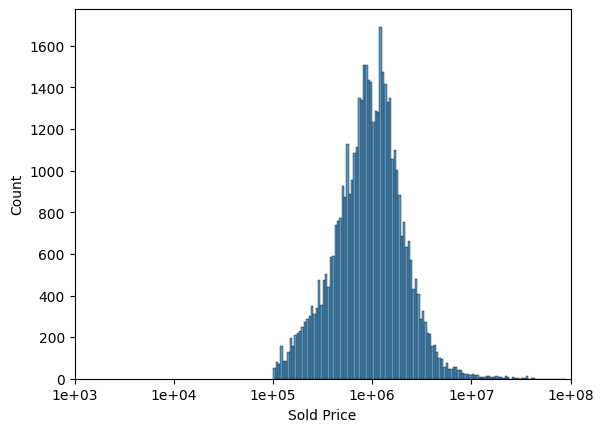

In [12]:
# Plot a histogram of the log of the 'Sold Price' to visualize its distribution.
ax = sns.histplot(np.log10(train_data['Sold Price']))
ax.set_xlim([3,8])
ax.set_xticks(range(3,9))
ax.set_xticklabels(['%.0e'%a for a in 10**ax.get_xticks()])

In [13]:
# Display the top 20 most frequent values in the 'Type' column of the dataset.
train_data['Type'].value_counts()[0:20]

Type
SingleFamily          31324
Condo                  8094
Townhouse              2545
Unknown                1597
MultiFamily            1292
MobileManufactured     1002
VacantLand              810
Single Family           177
Apartment               169
Residential Lot          49
Cooperative              48
MFD-F                    24
2 Story                  20
Acreage                  15
Duplex                   13
3 Story                  11
Manufactured Home         9
3 Story, Duplex           9
31                        7
Hi-Rise (9+)              7
Name: count, dtype: int64

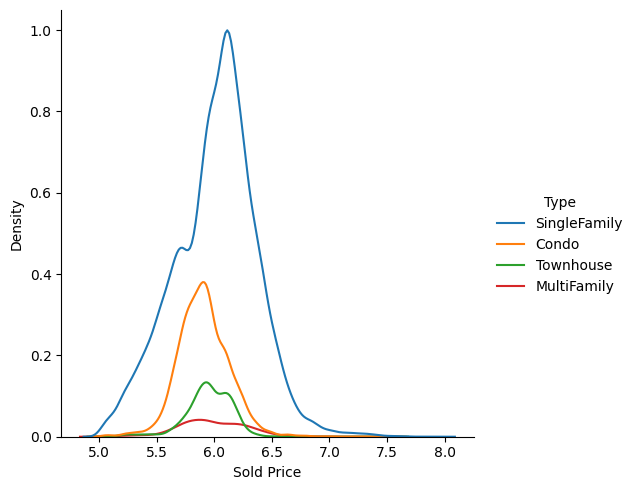

In [14]:
# Plot Kernel Density Estimation (KDE) for log-transformed 'Sold Price' of specific property types.
types = train_data['Type'].isin(['SingleFamily', 'Condo', 'MultiFamily', 'Townhouse'])
sns.displot(pd.DataFrame({'Sold Price' :np.log10(train_data[types]['Sold Price']), 'Type' :train_data[types]['Type']}), x='Sold Price', hue='Type', kind='kde')

In [15]:
'''
# Create a new feature 'Price per living sqft' by calculating the ratio of 'Sold Price' to 'Living sqft'.
train_data['Price per living sqft'] = train_data['Sold Price'] / train_data['Total interior livable area']
ax = sns.boxplot(x='Type', y='Price per living sqft', data=train_data[types], fliersize=0)
ax.set_ylim([0, 2000]);
'''

"\n# Create a new feature 'Price per living sqft' by calculating the ratio of 'Sold Price' to 'Living sqft'.\ntrain_data['Price per living sqft'] = train_data['Sold Price'] / train_data['Total interior livable area']\nax = sns.boxplot(x='Type', y='Price per living sqft', data=train_data[types], fliersize=0)\nax.set_ylim([0, 2000]);\n"

In [16]:
'''
# Visulize the 'Zip' feature and the 'price per living sqft'
d = train_data[train_data['Zip'].isin(train_data['Zip'].value_counts()[:20].keys())]
ax = sns.boxplot(x = 'Zip', y = 'Price per living sqft', data = d, fliersize = 0)
ax.set_ylim([0, 2000])
plt.xticks(rotation=90)
'''

"\n# Visulize the 'Zip' feature and the 'price per living sqft'\nd = train_data[train_data['Zip'].isin(train_data['Zip'].value_counts()[:20].keys())]\nax = sns.boxplot(x = 'Zip', y = 'Price per living sqft', data = d, fliersize = 0)\nax.set_ylim([0, 2000])\nplt.xticks(rotation=90)\n"

In [17]:
'''
# Visualize the correlation between these six factors 'Sold Price', 'Listed Price', 'Annual tax amount', 'Price per living sqft', 'Elementary School Score', 'High School Score':
_, ax = plt.subplots(figsize = (6,6))
columns = ['Sold Price', 'Listed Price', 'Annual tax amount', 'Price per living sqft', 'Elementary School Score', 'High School Score']
sns.heatmap(train_data[columns].corr(), annot = True, ax=ax);
'''

"\n# Visualize the correlation between these six factors 'Sold Price', 'Listed Price', 'Annual tax amount', 'Price per living sqft', 'Elementary School Score', 'High School Score':\n_, ax = plt.subplots(figsize = (6,6))\ncolumns = ['Sold Price', 'Listed Price', 'Annual tax amount', 'Price per living sqft', 'Elementary School Score', 'High School Score']\nsns.heatmap(train_data[columns].corr(), annot = True, ax=ax);\n"

In [18]:
#drop redundant features
redundant_cols = ['Address', 'Summary', 'City', 'State']
for c in redundant_cols:
    del test_data[c], train_data[c]

In [19]:
#process the big data
large_vel_cols = ['Lot', 'Total interior livable area', 'Tax assessed value', 'Annual tax amount', 'Listed Price']
for c in large_vel_cols:
    train_data[c] = np.log(train_data[c]+1)
    test_data[c] = np.log(test_data[c]+1)

In [20]:
#Feature process, filling 0 to the missing data
train_features = train_data.drop(columns=['Sold Price'])
test_features =  test_data
all_features = pd.concat([train_features, test_features], axis=0, ignore_index=True)
numeric_features = all_features.dtypes[all_features.dtypes == 'float64'].index
all_features = all_features.fillna(method='bfill', axis=0).fillna(0)

In [21]:
#normalization
all_features[numeric_features] = all_features[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

In [22]:
#creat featuers
features = list(numeric_features)

In [23]:
#show the features with object types for one-hot
for in_object in all_features.dtypes[all_features.dtypes=='object'].index:
    print(in_object.ljust(20),len(all_features[in_object].unique()))

Type                 174
Heating              2658
Parking              9911
Bedrooms             277
Region               1258
Elementary School    3567
High School          921
Flooring             1738
Heating features     1761
Appliances included  11289
Parking features     9693
Listed On            2815


In [24]:
#add 'Type','Bedrooms' into features
features.extend(['Type','Bedrooms'])
all_features = all_features[features]

In [25]:
#one-hot, and difference after one-hot
print('before one hot',all_features.shape)
all_features = pd.get_dummies(all_features,dummy_na=True)
print('after one hot',all_features.shape)

before one hot (79065, 16)
after one hot (79065, 467)


In [26]:
#split the train and validation data sets
from sklearn.model_selection import train_test_split
#spliting train , validation ,and test set
n_train = train_data.shape[0]
train_validation_features = torch.tensor(all_features[:n_train].values.tolist(), dtype=torch.float)
test_features = torch.tensor(all_features[n_train:].values.tolist(), dtype=torch.float)
train_validation_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1, 1), dtype=torch.float)
#spliting to train and validation dataset
train_features, validation_features, train_labels, validation_labels = train_test_split(train_validation_features, train_validation_labels, test_size=0.2, random_state=0)

In [27]:
# Define the models with customizable parameters
linear_model = LinearRegression()


decision_tree_model = DecisionTreeRegressor(
    max_depth=8,  # Maximum depth of the tree
    min_samples_split=16,  # Minimum number of samples required to split an internal node
    random_state=0
)
random_forest_model = RandomForestRegressor(
    n_estimators=20,  # Number of trees in the forest
    max_depth=None,  # Maximum depth of the tree
    min_samples_split=48,  # Minimum number of samples required to split an internal node
    random_state=0
)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(256,),  # Number and size of the hidden layers
    max_iter=5000,  # Maximum number of iterations
    solver='adam',  # Solver for weight optimization
    learning_rate_init=0.005,  # Initial learning rate
    early_stopping=True,  # Whether to use early stopping to terminate training when validation score is not improving
    validation_fraction=0.1,  # Proportion of training data to set aside as validation set for early stopping
    random_state=0
)

# Function to train and evaluate models
def train_evaluate(model, train_features, train_labels, val_features, val_labels):
    model.fit(train_features, train_labels.ravel())  # Train the model
    train_predictions = model.predict(train_features)  # Make predictions on train set
    val_predictions = model.predict(val_features)  # Make predictions on validation set
    train_mse = mean_squared_error(train_labels, train_predictions)  # Calculate MSE for train
    train_rmse = mean_squared_error(train_labels, train_predictions, squared=False)  # Calculate RMSE for train
    train_mae = mean_absolute_error(train_labels, train_predictions)  # Calculate MAE for train
    val_mse = mean_squared_error(val_labels, val_predictions)  # Calculate MSE for validation
    val_rmse = mean_squared_error(val_labels, val_predictions, squared=False)  # Calculate RMSE for validation
    val_mae = mean_absolute_error(val_labels, val_predictions)  # Calculate MAE for validation
    test_predictions = model.predict(test_features)  # Make predictions on test set
    return (train_mse, train_rmse, train_mae), (val_mse, val_rmse, val_mae)


In [28]:
# Linear Regression
print("Linear Regression Model Evaluation:")

linear_results = train_evaluate(linear_model, train_features, train_labels, validation_features, validation_labels)
print(f"  Train - MSE: {linear_results[0][0]}, RMSE: {linear_results[0][1]}, MAE: {linear_results[0][2]}")
print(f"  Validation - MSE: {linear_results[1][0]}, RMSE: {linear_results[1][1]}, MAE: {linear_results[1][2]}\n")
print(f"  Difference - MSE: {linear_results[0][0]-linear_results[1][0]}, RMSE: {linear_results[0][1]-linear_results[1][1]}, MAE: {linear_results[0][2]-linear_results[1][2]}\n")

Linear Regression Model Evaluation:
  Train - MSE: 1582648000512.0, RMSE: 1258033.375, MAE: 493546.15625
  Validation - MSE: 57870351597568.0, RMSE: 7607256.5, MAE: 791800.3125

  Difference - MSE: -56287702286336.0, RMSE: -6349223.0, MAE: -298254.15625



In [29]:
# Decision Tree Regression
print("Decision Tree Model Evaluation:")

decision_tree_results = train_evaluate(decision_tree_model, train_features, train_labels, validation_features, validation_labels)
print(f"  Train - MSE: {decision_tree_results[0][0]}, RMSE: {decision_tree_results[0][1]}, MAE: {decision_tree_results[0][2]}")
print(f"  Validation - MSE: {decision_tree_results[1][0]}, RMSE: {decision_tree_results[1][1]}, MAE: {decision_tree_results[1][2]}\n")
print(f"  Difference - MSE: {decision_tree_results[0][0]-decision_tree_results[1][0]}, RMSE: {decision_tree_results[0][1]-decision_tree_results[1][1]}, MAE: {decision_tree_results[0][2]-decision_tree_results[1][2]}\n")

Decision Tree Model Evaluation:
  Train - MSE: 441587697453.7708, RMSE: 664520.6523907069, MAE: 141671.29821131565
  Validation - MSE: 931156285906.1067, RMSE: 964964.3961857384, MAE: 167452.58658047416

  Difference - MSE: -489568588452.3359, RMSE: -300443.74379503145, MAE: -25781.288369158516



In [30]:
# Random Forest Regression
print("Random Forest Model Evaluation:")

random_forest_results = train_evaluate(random_forest_model, train_features, train_labels, validation_features, validation_labels)
print(f"  Train - MSE: {random_forest_results[0][0]}, RMSE: {random_forest_results[0][1]}, MAE: {random_forest_results[0][2]}")
print(f"  Validation - MSE: {random_forest_results[1][0]}, RMSE: {random_forest_results[1][1]}, MAE: {random_forest_results[1][2]}\n")
print(f"  Difference - MSE: {random_forest_results[0][0]-random_forest_results[1][0]}, RMSE: {random_forest_results[0][1]-random_forest_results[1][1]}, MAE: {random_forest_results[0][2]-random_forest_results[1][2]}\n")

Random Forest Model Evaluation:
  Train - MSE: 520293391717.3658, RMSE: 721313.6569602477, MAE: 123053.45506929864
  Validation - MSE: 710399086135.8394, RMSE: 842851.7581021228, MAE: 149900.95975540808

  Difference - MSE: -190105694418.47357, RMSE: -121538.10114187514, MAE: -26847.504686109445



In [31]:

# MLP Regression
print("MLP Model Evaluation:")

mlp_results = train_evaluate(mlp_model, train_features, train_labels, validation_features, validation_labels)
print(f"  Train - MSE: {mlp_results[0][0]}, RMSE: {mlp_results[0][1]}, MAE: {mlp_results[0][2]}")
print(f"  Validation - MSE: {mlp_results[1][0]}, RMSE: {mlp_results[1][1]}, MAE: {mlp_results[1][2]}\n")
print(f"  Difference - MSE: {mlp_results[0][0]-mlp_results[1][0]}, RMSE: {mlp_results[0][1]-mlp_results[1][1]}, MAE: {mlp_results[0][2]-mlp_results[1][2]}\n")


MLP Model Evaluation:
  Train - MSE: 709725229335.2216, RMSE: 842451.9151472216, MAE: 173406.82142168185
  Validation - MSE: 824573654627.4146, RMSE: 908060.3804964814, MAE: 174901.33554506625

  Difference - MSE: -114848425292.193, RMSE: -65608.46534925979, MAE: -1494.5141233844042



In [32]:
# Linear model Prediction 
predictions = linear_model.predict(test_features)

test_data['Sold Price'] = pd.Series(predictions.reshape(1, -1)[0])
submission = pd.concat([test_data['Id'], test_data['Sold Price']], axis=1)
submission.to_csv('Linear.csv', index=False)

In [33]:
# Decision Tree Prediction 
predictions = decision_tree_model.predict(test_features)

test_data['Sold Price'] = pd.Series(predictions.reshape(1, -1)[0])
submission = pd.concat([test_data['Id'], test_data['Sold Price']], axis=1)
submission.to_csv('Decision_Tree_model.csv', index=False)

In [34]:
# Random Forest Prediction 
predictions = random_forest_model.predict(test_features)

test_data['Sold Price'] = pd.Series(predictions.reshape(1, -1)[0])
submission = pd.concat([test_data['Id'], test_data['Sold Price']], axis=1)
submission.to_csv('Random_forest_model.csv', index=False)

In [35]:
# MLP Prediction 
predictions = mlp_model.predict(test_features)

test_data['Sold Price'] = pd.Series(predictions.reshape(1, -1)[0])
submission = pd.concat([test_data['Id'], test_data['Sold Price']], axis=1)
submission.to_csv('MLP_model.csv', index=False)